**Анализ базы данных avocado prices**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Загрузка данных**

In [119]:
import csv
price = pd.read_csv("avocado.csv")
price.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [98]:
price.filter("Total Volume")

""
0
1
2
3
4
...
18244
18245
18246
18247


**Сортировка данных**

In [73]:
df = pd.read_csv("avocado.csv")
sorted_df = df.sort_values(by = ["AveragePrice"],ascending = False)
sorted_df.to_csv('price_sorted.csv', index = False)

In [99]:
 price_sorted = pd.read_csv("price_sorted.csv")
 price_sorted.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco
1,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017,Tampa
2,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016,SanFrancisco
3,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017,MiamiFtLauderdale
4,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017,RaleighGreensboro


**Добавление новых данных**

In [100]:
import os

In [101]:
new_col = ['much', 'small', 'much', 'small','much', 'small']
print (new_col)

['much', 'small', 'much', 'small', 'much', 'small']


In [102]:
price_sorted_new = pd.read_csv('price_sorted.csv')

**Группировка данных и базовая визуализация** 

In [103]:
price = pd.read_csv("avocado.csv")
price

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [104]:
gk = price.groupby('type')
gk.first()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,,,
conventional,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
organic,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,2015,Albany


In [105]:
price['AveragePrice'].mean()

price['AveragePrice'].median()

1.37

In [120]:
price['AveragePrice'].mode()

0    1.15
Name: AveragePrice, dtype: float64

In [83]:
price.var()

C:\Users\mvideo\AppData\Local\Temp\ipykernel_5656\2665279894.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  price.var()


Unnamed: 0      2.396627e+02
AveragePrice    1.621484e-01
Total Volume    1.192698e+13
4046            1.600197e+12
4225            1.449906e+12
4770            1.154853e+10
Total Bags      9.726741e+11
Small Bags      5.567824e+11
Large Bags      5.951939e+10
XLarge Bags     3.130385e+08
year            8.834843e-01
dtype: float64

In [84]:
price.std()

C:\Users\mvideo\AppData\Local\Temp\ipykernel_5656\1825353256.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  price.std()


Unnamed: 0      1.548104e+01
AveragePrice    4.026766e-01
Total Volume    3.453545e+06
4046            1.264989e+06
4225            1.204120e+06
4770            1.074641e+05
Total Bags      9.862424e+05
Small Bags      7.461785e+05
Large Bags      2.439660e+05
XLarge Bags     1.769289e+04
year            9.399385e-01
dtype: float64

**z-оценка**

In [85]:
import scipy.stats as stats
values = [1,2,3,4,5,6,7,8,9,10]

In [86]:
zscores = stats.zscore(values)
print(zscores)

[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


**Выборосы и работа с пропущенными значениями**

In [108]:
price.head(10000)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,37,2015-04-12,1.79,4127.83,86.70,151.38,0.00,3889.75,3889.75,0.00,0.0,organic,2015,HarrisburgScranton
9996,38,2015-04-05,1.75,3315.89,28.96,155.83,7.44,3123.66,3123.66,0.00,0.0,organic,2015,HarrisburgScranton
9997,39,2015-03-29,1.79,3705.26,48.19,204.38,0.00,3452.69,3452.69,0.00,0.0,organic,2015,HarrisburgScranton
9998,40,2015-03-22,2.09,1169.94,45.70,391.89,0.00,732.35,732.35,0.00,0.0,organic,2015,HarrisburgScranton


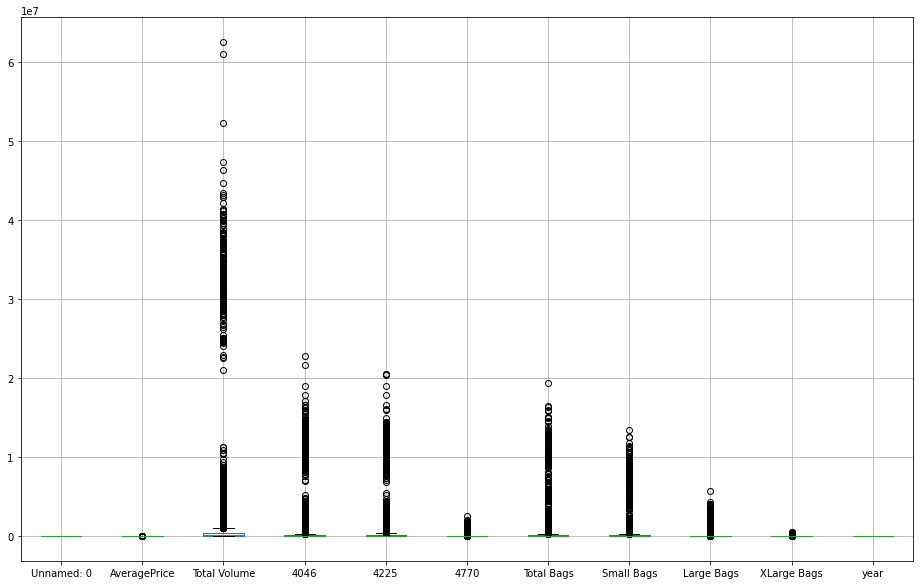

In [109]:
plt.figure(figsize = (16,10))
price.boxplot()
plt.show()

In [116]:
def outlier_limits (col):
  Q3, Q1 = np.nanpercentile (col,[75,25])
  IQR = Q3-Q1
  UL = Q3+1.5*IQR
  LL = Q1-1.5*IQR
  return UL, LL

In [117]:
for column in df.columns:
  if df[column].dtype != 'object':
    UL, LL = outlier_limits(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column]) 

In [118]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Корреляция** 

In [121]:
cor = price.corr()
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

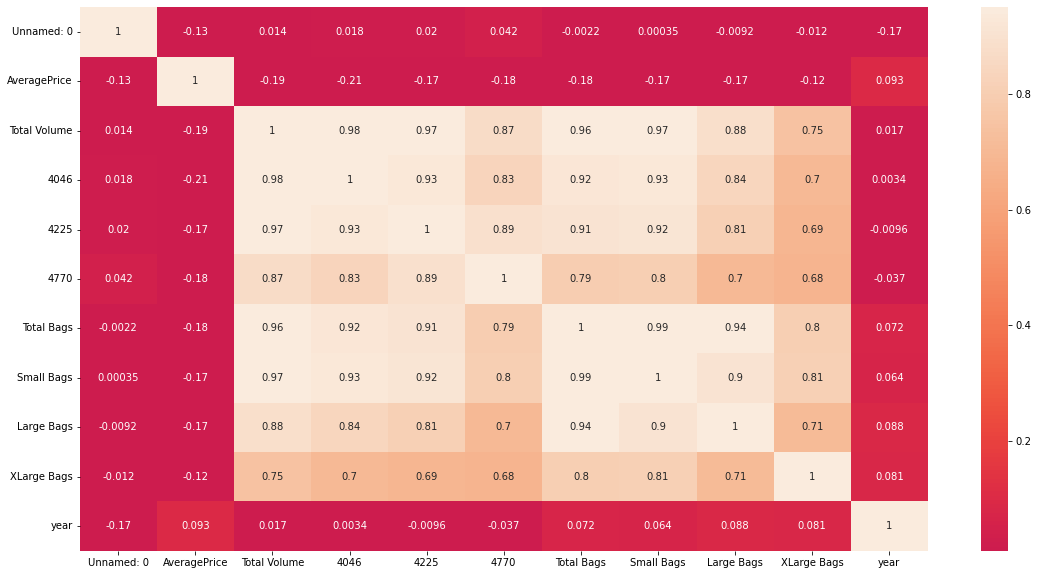

In [115]:
plt.figure(figsize = (19,10))
sns.heatmap(data = cor, annot = True, cmap = 'rocket', center = 0, vmin = 0.01, vmax = 0.95)

**Визуализация данных на диаграмме** 

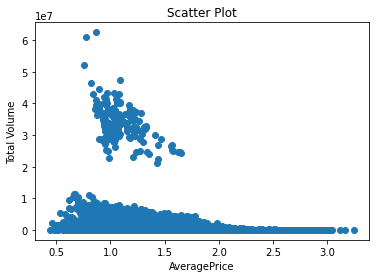

In [95]:
plt.scatter(price['AveragePrice'], price['Total Volume'])
plt.title("Scatter Plot")
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.show()